# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from sklearn import datasets

# Neural Network Implementation

In [2]:
class Neural_Network():
    def __init__(self, neurons, Activations, epochs=1000, learning_rate=0.001, loss='squared'): 
        # arguments: an array "neurons" consist of number of neurons for each layer, 
        # an array "activations" consisting of activation functions used for the hidden layers and output layer
        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] #weights for each layer
        self.biases = [] #biases in each layer 
        self.layer_activations = [] #activations in each layer
        self.epochs = epochs #number of epochs to train the network
        self.learning_rate = learning_rate #learning rate used for training
        self.loss_function = loss
        np.random.seed(0)
        for i in range(len(neurons)-1): 
            self.weights.append(np.random.rand(neurons[i+1],neurons[i])) #weight matrix between layer i and layer i+1
            self.biases.append(np.random.rand(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) #activations for each layer
        
    def sigmoid(self, z): # sigmoid activation function
        #Fill in the details to compute and return the sigmoid activation function                  
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoidPrime(self, z): # derivative of sigmoid activation function
        #Fill in the details to compute and return the derivative of sigmoid activation function
        return self.sigmoid(z) * (1 - self.sigmoid(z))
                          
    def tanh(self, z): # hyperbolic tan activation function
        #Fill in the details to compute and return the tanh activation function                  
        exp_z = np.exp(z)
        exp_z_negative = np.exp(-z)
        return (exp_z - exp_z_negative) / (exp_z + exp_z_negative)  
    
    def tanhPrime(self, z): # derivative of hyperbolic tan activation function
        #Fill in the details to compute and return the derivative of tanh activation function
        return 1 - self.tanh(z) ** 2
                          
    def linear(self, z): # Linear activation function
        #Fill in the details to compute and return the linear activation function                                    
        return z
    
    def linearPrime(self, z): # derivative of linear activation function
        #Fill in the details to compute and return the derivative of activation function                                                      
        return np.ones(z.shape)

    def ReLU(self, z): # ReLU activation function
        #Fill in the details to compute and return the ReLU activation function                  
        return np.where(z < 0, 0, z)
    
    def ReLUPrime(self, z): # derivative of ReLU activation function
        #Fill in the details to compute and return the derivative of ReLU activation function
        return np.where(z < 0, 0, 1)
    
    def softmax(self, z): # Softmax activation function
        z = z - np.max(z, axis=0)
        z_exp = np.exp(z)
        return z_exp / np.sum(z_exp, axis=0)          
    
    def forward(self, a): # function of forward pass which will receive input and give the output of final layer
        # Write the forward pass using the weights and biases to find the predicted value and return them.
        layer_activations_a = [a] #store the input as the input layer activations
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]
            z = np.dot(w, a) + b
            if self.layer_activations[i].lower()  == 'sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower() == 'relu':
                a = self.ReLU(z)    
            elif self.layer_activations[i].lower() == 'tanh':   
                a = self.tanh(z)
            elif self.layer_activations[i].lower() == 'linear':
                a = self.linear(z)
            elif self.layer_activations[i].lower() == 'softmax':
                a = self.softmax(z)
            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)

        return a, layer_dot_prod_z, layer_activations_a
        
    def loss(self, Y_hat, Y):
        #Implement the loss function
        epsilon = 10 ** -5
#         print(f'Y : {Y.shape}')
#         print(f'Y_hat : {Y_hat.shape}')
        if self.loss_function.lower() == 'cross-entropy':
            Y_hat = np.where(Y_hat == 1, 1 - epsilon, Y_hat)
            Y_hat = np.where(Y_hat == 0, epsilon, Y_hat)
            error = - Y * np.log(Y_hat) - (1 - Y) * np.log(1 - Y_hat) 
        elif self.loss_function.lower() == 'squared':
            error = 0.5 * (Y_hat - Y) ** 2
        return error

    def loss_grad(self, Y_hat, Y):
        #Return the gradient of the loss function -
        # 1. w.r.t. activations for squared-error 
        # 2. w.r.t. z for cross-entropy loss
        grad = Y_hat - Y
        return grad
        
    def backward(self, x, y, zs, activations): # find the loss and return derivative of loss w.r.t every parameter
        # Write the backpropagation algorithm here to find the gradients of weights and biases and return them.
        # Assuming L2 loss
        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        delta = self.loss_grad(activations[-1], y)
        if self.layer_activations[-1].lower() == 'sigmoid':
            delta = delta * self.sigmoidPrime(zs[-1])
        elif self.layer_activations[-1].lower() == 'relu':
            delta = delta * self.ReLUPrime(zs[-1])
        elif self.layer_activations[-1].lower() == 'tanh':
            delta = delta * self.tanhPrime(zs[-1])   
        elif self.layer_activations[-1].lower() == 'linear':
            delta = delta * self.linearPrime(zs[-1])
        
        # Number of training examples = m
        m = delta.shape[1]
        # fill in the appropriate details for gradients of w and b
        grad_w[-1] = np.dot(delta, activations[-2].T) / m 
        grad_b[-1] = np.sum(delta, axis=1, keepdims=True) / m

        for l in range(2, self.layers): # Here l is in backward sense i.e. last lth layer
            z = zs[-l]
            if self.layer_activations[-l].lower() == 'sigmoid':
                prime = self.sigmoidPrime(z)
            elif self.layer_activations[-l].lower() == 'relu':
                prime = self.ReLUPrime(z)
            elif self.layer_activations[-l].lower() == 'tanh':   
                prime = self.tanhPrime(z)
            elif self.layer_activations[-l].lower() == 'linear':
                prime = self.linearPrime(z)

            #Compute delta, gradients of b and w
            delta = np.dot(self.weights[-l+1].T, delta) * prime
            grad_w[-l] = np.dot(delta, activations[-l-1].T) / m 
            grad_b[-l] = np.sum(delta, axis=1, keepdims=True) / m

        return (grad_b, grad_w)   

    def update_parameters(self, grads, learning_rate): # update the parameters using the gradients
        # update weights and biases using the gradients and the learning rate
        grad_b, grad_w = grads[0], grads[1]       
        
        #Implement the update rule for weights  and biases
        self.weights = [self.weights[i] - learning_rate * grad_w[i] for i in range(len(self.weights))]
        self.biases = [self.biases[i] - learning_rate * grad_b[i] for i in range(len(self.biases))] 
        
    def train(self, X, Y, minibatch=False, batch_size=20, verbose=False): # receive the full training data set
        lr = self.learning_rate # learning rate
        epochs = self.epochs # number of epochs
        loss_list = []
        for e in range(epochs): 
            losses = []
            for q in range(len(X)):
                if minibatch == False:
                    rows_x, cols_x = X[q].shape[0], 1
                    rows_y, cols_y = Y[q].shape[0], 1
                else:
                    rows_x, cols_x = X[q].shape[1], X[q].shape[0]
                    rows_y, cols_y = Y[q].shape[1], Y[q].shape[0]

                train_x = np.resize(X[q], (rows_x, cols_x))
                train_y = np.resize(Y[q],(rows_y, cols_y))
                
                out, dot_prod_z, activations_a = self.forward(train_x)
                loss = self.loss(out, train_y)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass
                self.update_parameters(grads, lr)
                losses.append(loss)
            
            loss_mean = np.mean(np.array(losses))
            loss_list.append(loss_mean)
            if verbose:
                print(f'Epoch: {e} Loss: {loss_mean}')
        return loss_list
        
    def predict(self, x):
        print ("Input : \n" + str(x))
        prediction,_,_ = self.forward(x)
        print ("Output: \n" + str(prediction))


# Miscellaneous Functions

### One-hot encoder

In [3]:
# a method for creating one hot encoded labels 
def onehotencoding(Y):
    rows = Y.shape[0]
    values = {e:i for i, e in enumerate(np.unique(Y))}
    y_enc = np.zeros((rows, len(values)))
    for i in range(rows):
        j = values[Y[i]]
        y_enc[i][j] = 1
    return y_enc

### Create mini-batches

In [4]:
#a method to create minibatches 
def create_minibatches(X, Y, minibatchsize):
    numbatches = int(np.ceil(len(X)/minibatchsize))
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    X_minibatches = []
    Y_minibatches = [] 
    for i in range(numbatches):
        idx_minibatch = idx[i*minibatchsize:min(len(idx),(i+1)*minibatchsize)]
        xn = np.take(X,idx_minibatch,axis=0) 
        yn = np.take(Y,idx_minibatch,axis=0)
        X_minibatches.append(xn)
        Y_minibatches.append(yn)
    X_minibatches, Y_minibatches = np.array(X_minibatches), np.array(Y_minibatches)
    return X_minibatches, Y_minibatches

### Test mini-batches created

In [5]:
def test_create_minibatches():
    X = []
    Y = []
    batch_size = 2
    for i in range(20):
        if(i % 2 == 0):
            X.append([np.random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([np.random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)

    X_mb, Y_mb = create_minibatches(X,Y,batch_size)
    print(X_mb, Y_mb)


### Generate random data

In [6]:
def generateData(inputsize=3, onehotencoded=False, minibatch=False, batch_size=5):
    X = []
    Y = []
    random.seed(0)
    for i in range(500):
        if(i % 2 == 0):
            X.append([random.randint(1,10) for i1 in range(inputsize)])
            Y.append(1)
        else:
            X.append([random.randint(-10,1) for i1 in range(inputsize)])
            Y.append(0)
    X = np.array(X)
    Y = np.array(Y)
    if onehotencoded:
        Y = onehotencoding(Y)

    if minibatch == False:
        train_X = X
        train_Y = Y
    else:
        train_X, train_Y = create_minibatches(X, Y, batch_size)
    return train_X, train_Y

# Question 2

## Question 2(1)(d)

(500, 3) (500, 1)


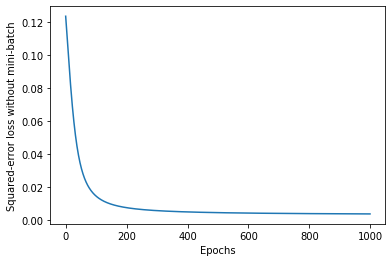

In [7]:
def plot_2d():
    #D_in is input dimension
    #H1 is dimension of first hidden layer 
    #H2 is dimension of second hidden layer
    #D_out is output dimension.
    epochs = 1000
    learning_rate = 0.001
    inputsize = 3
    loss_function = 'squared'
    
    onehotencoded = False
    minibatch = False
    train_X, train_Y = generateData(inputsize, onehotencoded, minibatch)
    train_Y = train_Y.reshape((train_Y.shape[0], 1))
    
    print(train_X.shape, train_Y.shape)

    D_in, H1, H2, H3, H4, D_out = inputsize, 10, 10, 10, 10, 1 
    # list of number of neurons in the layers sequentially.
    neurons = [D_in, H1, H2, H3, H4, D_out] 
    # activations in each layer (Note: the input layer does not have any activation)
    activation_functions = ['linear','linear', 'tanh', 'relu', 'sigmoid'] 

    # Train the network
    neuralnet = Neural_Network(neurons, activation_functions, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)
    
    # Plot the results
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Squared-error loss without mini-batch')
    plt.show()

plot_2d()

## Question 2(1)(e)

(25, 20, 3) (25, 20, 1)


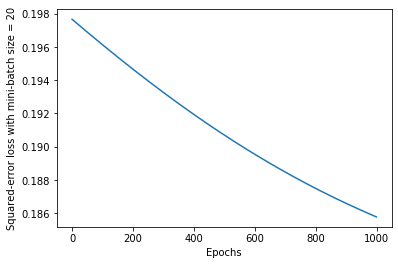

In [8]:
def plot_2e():
    #D_in is input dimension
    #H1 is dimension of first hidden layer 
    #H2 is dimension of second hidden layer
    #D_out is output dimension.
    epochs = 1000
    learning_rate = 10 ** -3
    inputsize = 3
    loss_function = 'squared'

    onehotencoded = False
    minibatch = True
    batch_size = 20
    train_X, train_Y = generateData(inputsize, onehotencoded, minibatch, batch_size)
    num_batches = train_X.shape[0]
    train_Y = train_Y.reshape(num_batches, batch_size, 1)
    
    print(train_X.shape, train_Y.shape)

    D_in, H1, H2, H3, H4, D_out = inputsize, 10, 10, 10, 10, 1 
    # list of number of neurons in the layers sequentially.
    neurons = [D_in, H1, H2, H3, H4, D_out] 
    # activations in each layer (Note: the input layer does not have any activation)
    activation_functions = ['linear','linear', 'tanh', 'relu', 'sigmoid'] 

    # Train the network
    neuralnet = Neural_Network(neurons, activation_functions, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)

    # Plot the results
    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel('Squared-error loss with mini-batch size = 20')
    plt.show()

plot_2e()

## Question 2(1)(f)
### Observation 
Stochastic gradient descent performs better than mini-batch gradient descent.
### Why?

## Question 2(2)

### Exploding and vanishing gradients

# Question 3

### Import dataset

In [9]:
def loadData_3():
    data = datasets.load_digits()
    return data['data'], data['target']

### Data preprocessing

In [14]:
def preprocess_3():
    X, Y = loadData_3()
    X = X / 255
    return X, Y
    

### Train neural network

In [15]:
# Neural network with Squared-Error loss
def train_3_se(batch_size=1, learning_rate=0.0001): 
    # Number of neurons in each layer
    neurons = [64, 256, 128, 1]
    activations = ['sigmoid', 'sigmoid', 'relu']
    loss_function = 'squared'
    epochs = 200

    # Data preprocessing
    onehotencoded = False
    minibatch = True
    X, Y = preprocess_3()
    # Need to choose train set size based on the batch_sizes in question 3(e)
    X, Y = X[:1500], Y[:1500]
    X, Y = create_minibatches(X, Y, batch_size)
    
    # Split training and test data
    num_training = 1500
    num_batches = num_training // batch_size
    train_X, train_Y = X[: num_batches], Y[: num_batches]    
    train_Y = train_Y.reshape((num_batches, batch_size, 1))

    print(train_X.shape, train_Y.shape)
    
    # Train the network
    neuralnet = Neural_Network(neurons, activations, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)    
    return neuralnet, loss
    
# neuralnet, loss = train_3_se([1], [0.0001])

In [16]:
# Neural network with Cross-Entropy loss
def train_3_ce(batch_size=1, learning_rate=0.0001):
    # Number of neurons in each layer
    neurons = [64, 256, 128, 10]
    activations = ['sigmoid', 'sigmoid', 'softmax']
    loss_function = 'cross-entropy'
    epochs = 200

    # Data preprocessing
    onehotencoded = False
    minibatch = True
    X, Y = preprocess_3()
    # Need to choose train set size based on the batch_sizes in question 3(e)
    X, Y = X[:1500], Y[:1500]
    Y = onehotencoding(Y)
    X, Y = create_minibatches(X, Y, batch_size)

    # Split training and test data
    num_training = 1500
    num_batches = num_training // batch_size
    train_X, train_Y = X[: num_batches], Y[: num_batches]
    train_Y = train_Y.reshape((num_batches, batch_size, 10))    

    print(train_X.shape, train_Y.shape)
    
    # Train the network
    neuralnet = Neural_Network(neurons, activations, epochs, learning_rate, loss_function)
    loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)
    return neuralnet, loss

# neuralnet, loss = train_3_ce()

## Question 3(a)

### Squared Error Loss

Squared-error loss function is used in the regression scenario with number of output layer neurons = 1.
This neuron predicts values in the range 0 to 9. The activation function used here is ReLU.

### Cross-Entropy Loss
CE loss function is used for multi-class classification and the number of output layer neurons in this case = 10.
The output layer returns one-hot encoded values for labels in the range 0 to 9.
Activation function used in this case is softmax.

## Question 3(b)
### Plot squared-error and cross-entropy loss

(1500, 1, 64) (1500, 1, 1)
(1500, 1, 64) (1500, 1, 10)


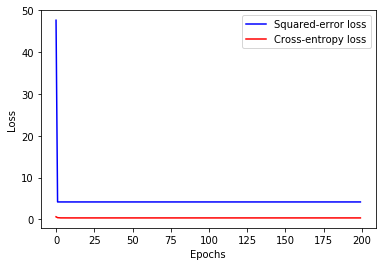

In [17]:
def plot_3b():
    neuralnet_se, loss_se = train_3_se()
    neuralnet_ce, loss_ce = train_3_ce()
    plt.ylabel(f'Loss')
    plt.xlabel('Epochs')
    
    line, = plt.plot(loss_se, 'b')
    line.set_label(f'Squared-error loss')
    line, = plt.plot(loss_ce, 'r')
    line.set_label(f'Cross-entropy loss')
    
    plt.legend()
    plt.show()

plot_3b()

## Question 3(c)
### Comparision of squared-error loss by varying learning rates

In [ ]:
def plot_3c():
    batch_size = 1
    lrs = [10 ** -1, 10 ** -2, 10 ** -3, 10 ** -5, 10 ** -6]
    losses = []
    for lr in lrs:
        neuralnet, loss = train_3_se(batch_size, lr)
        losses.append(loss)
    
    # Plot the losses
    colors = ['c', 'r', 'y', 'k', 'g']
    for i in range(len(losses)):
        line, = plt.plot(losses[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    
    plt.ylabel('Squared-Error loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

plot_3c()

(1500, 1, 64) (1500, 1, 1)
(1500, 1, 64) (1500, 1, 1)
(1500, 1, 64) (1500, 1, 1)


## Question 3(d)
### Comparision of cross-entropy loss by varying learning rates

In [ ]:
def plot_3d():
    batch_size = 1
    lrs = [10 ** -1, 10 ** -2, 10 ** -3, 10 ** -5, 10 ** -6]
    losses = []
    for lr in lrs:
        neuralnet, loss = train_3_ce(batch_size, lr)
        losses.append(loss)
    
    # Plot the losses
    colors = ['c', 'r', 'y', 'k', 'g']
    for i in range(len(losses)):
        line, = plt.plot(losses[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    
    plt.ylabel('Cross-entropy loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

plot_3d()

## Question 3(e)

### Comparision of squared-error loss by varying mini-batch size

Learning rate = 10^(-5)

In [ ]:
def plot_3e_se():
    lr = 10 ** -5
    batch_sizes = [50, 100, 250, 300, 500]
    losses = []
    for batch_size in batch_sizes:
        neuralnet, loss = train_3_se(batch_size, lr)
        losses.append(loss)
    
    # Plot the losses
    colors = ['c', 'r', 'y', 'k', 'g']
    for i in range(len(losses)):
        line, = plt.plot(losses[i], colors[i])
        line.set_label(f'Batch size = {batch_sizes[i]}')
    
    plt.ylabel('Squared-error loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

plot_3e_se()

### Comparision of cross-entropyloss by varying mini-batch size

Learning rate = 10^(-5)

In [ ]:
def plot_3e_ce():
    lr = 10 ** -5
    batch_sizes = [50, 100, 250, 300, 500]
    losses = []
    for batch_size in batch_sizes:
        neuralnet, loss = train_3_ce(batch_size, lr)
        losses.append(loss)
    
    # Plot the losses
    colors = ['c', 'r', 'y', 'k', 'g']
    for i in range(len(losses)):
        line, = plt.plot(losses[i], colors[i])
        line.set_label(f'Batch size = {batch_sizes[i]}')
    
    plt.ylabel('Squared-error loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

plot_3e_ce()

### Observation
In both the cases, with increasing batch-size, performance degrades.

### Reason
The number of updates is inversely proportional to the batch-size.
As the batch size increases, fewer corrections are made to the weights.
This leads to underfitting and error decreases slowly.


# Question 4

## Question 4(a)
### Split the data into S1 and S2 datasets

In [ ]:
def split_data_4a():
    x, y = preprocess_3()
    np.random.seed(0)
    np.random.shuffle(x)
    np.random.shuffle(y)
    num_samples = x.shape[0]
    num_samples_s1 = int((num_samples * 0.8 // 50) * 50)
    num_samples_s2 = int((num_samples * 0.2 // 50) * 50)
    s1 = (x[:num_samples_s1], y[:num_samples_s1])
    s2 = (x[:num_samples_s2], y[:num_samples_s2])
    return (s1, s2)
    

## Question 4(b)
### Functions to compute squared-error and cross-entropy loss

In [ ]:
# Neural network with Squared-Error loss
def train_4b_se(learning_rate=0.0001): 
    # Number of neurons in each layer
    neurons = [64, 256, 128, 1]
    activations = ['sigmoid', 'sigmoid', 'relu']
    loss_function = 'squared'
    epochs = 200

    # Data preprocessing
    onehotencoded = False
    minibatch = True
    batch_size = 50
    samples = split_data_4a()

    neuralnets = []
    losses = []
    for sample in samples:
        X, Y = sample

        # Create mini-batches
        num_batches = int(X.shape[0] / batch_size)
        train_X, train_Y = create_minibatches(X, Y, batch_size)
        train_Y = train_Y.reshape((num_batches, batch_size, 1))

        print(train_X.shape, train_Y.shape)

         # Train the network
        neuralnet = Neural_Network(neurons, activations, epochs, learning_rate, loss_function)
        loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)    
        
        neuralnets.append(neuralnet)
        losses.append(loss)
        
    return neuralnets, losses

# neuralnet, loss = train_4b_se()

In [ ]:
# Neural network with Cross-Entropy loss
def train_4b_ce(learning_rate=0.0001): 
    # Number of neurons in each layer
    neurons = [64, 256, 128, 10]
    activations = ['sigmoid', 'sigmoid', 'softmax']
    loss_function = 'cross-entropy'
    epochs = 200

    # Data preprocessing
    onehotencoded = False
    minibatch = True
    batch_size = 50
    samples = split_data_4a()
    
    neuralnets = []
    losses = []
    for sample in samples:
        X, Y = sample

        # Create mini-batches
        num_batches = int(X.shape[0] / batch_size)
        train_X, train_Y = create_minibatches(X, Y, batch_size)
        train_Y = train_Y.reshape((num_batches, batch_size, 1))

        print(train_X.shape, train_Y.shape)

         # Train the network
        neuralnet = Neural_Network(neurons, activations, epochs, learning_rate, loss_function)
        loss = neuralnet.train(train_X, train_Y, minibatch=minibatch)        
        
        neuralnets.append(neuralnet)
        losses.append(loss)
    
    return neuralnets, losses

# neuralnet, loss = train_4b_ce()

## Question 4(c)
### Selecting a suitable learning rate for squared-error loss 

In [ ]:
def plot_4c():
    lrs = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]
    losses_s1, losses_s2 = [], []
    
    for lr in lrs:
        neuralnets, losses = train_4b_se(lr)
        # Record every 5th epoch loss
        losses_s1.append(losses[0][::5])
        losses_s2.append(losses[1][::5])
    
    # Plot the losses for the two samples
    colors = ['c', 'r', 'y', 'k', 'g', 'y']
    for i in range(len(losses_s1)):
        line, = plt.plot(losses_s1[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    plt.ylabel('Squared-error loss for S1')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
    for i in range(len(losses_s2)):
        line, = plt.plot(losses_s2[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    plt.ylabel('Squared-error loss for S2')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
plot_4c()

## Question 4(d)
### Selecting a suitable learning rate for cross-entropy loss 

In [ ]:
def plot_4c():
    lrs = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]
    losses_s1, losses_s2 = [], []
    
    for lr in lrs:
        neuralnets, losses = train_4b_ce(lr)
        # Record every 5th epoch loss
        losses_s1.append(losses[0][::5])
        losses_s2.append(losses[1][::5])
    
    # Plot the losses for the two samples
    colors = ['c', 'r', 'y', 'k', 'g', 'y']
    for i in range(len(losses_s1)):
        line, = plt.plot(losses_s1[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    plt.ylabel('Squared-error loss for S1')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
    for i in range(len(losses_s2)):
        line, = plt.plot(losses_s2[i], colors[i])
        line.set_label(f'Learning rate = {lrs[i]}')
    plt.ylabel('Squared-error loss for S2')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
plot_4c()

## Question 4(e)
### Comparision between learning rates for 3(c), 3(d) with 4(c), 4(d)